In [12]:
from sklearn.manifold import TSNE
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sklearn
import pandas as pd
%matplotlib inline

# import data from csv
dataframe = pandas.read_csv('Scoring.csv',usecols = range(0,19), engine='python')
X = dataframe.values

# Initialize Dictionaries and Lists
players2008 = {}
players2009 = {}
players2010 = {}
players2011 = {}
players_2008 = []
players_2009 = []
players_2010 = []
players_2011 = []

#Find players who have played in 2008-2011 seasons at least half of the season
for i in X:
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2008) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2008:
            players2008[i[0]] += 1
        else:
            players2008[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2009) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2009:
            players2009[i[0]] += 1
        else:
            players2009[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2010) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2010:
            players2010[i[0]] += 1
        else:
            players2010[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2011) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2011:
            players2011[i[0]] += 1
        else:
            players2011[i[0]] = 1


# Remove players who have multiple team appearances in a season
for i in players2008.keys():
    if players2008[i] > 1:
        del players2008[i]
for i in players2009.keys():
    if players2009[i] > 1:
        del players2009[i]
for i in players2010.keys():
    if players2010[i] > 1:
        del players2010[i]
for i in players2011.keys():
    if players2011[i] > 1:
        del players2011[i]     

#Add players to lists if they have played in all three seasons
for i in X:
    if ((i[0] in players2008) and (i[0] in players2009) and (i[0] in players2010) and (i[0] in players2011)) and (i[6]>41 and i[6] != 'nan'):
        if (i[1] == 2008):
            players_2008.append(i)
        if (i[1] == 2009):
            players_2009.append(i)
        if (i[1] == 2010):
            players_2010.append(i)
        if (i[1] == 2011):
            players_2011.append(i)


In [13]:
X_2008 = []
X_2009 = []
X_2010 = []
X_2011 = []

for i in players_2008:
    X_2008.append(i[6:19])
X_2008 = np.delete(X_2008,[3,4,8,9,10,11],1)

for i in players_2009:
    X_2009.append(i[6:19])
X_2009 = np.delete(X_2009,[3,4,8,9,10,11],1)

for i in players_2010:
    X_2010.append(i[6:19])
X_2010 = np.delete(X_2010,[3,4,8,9,10,11],1)

for i in players_2011:
    X_2011.append(i[6:19])
X_2011 = np.delete(X_2011,[3,4,8,9,10,11],1)

# Calculate target data from 2009
Y_2009 = []

for players in players_2009:
    Y_2009.append((players[7]*6)+(players[8]*4)+(players[18])+(players[12]+players[13]))

# Calculate target data from 2010
Y_2010 = []

for players in players_2010:
    Y_2010.append((players[7]*6)+(players[8]*4)+(players[18])+(players[12]+players[13]))

Stats = []
for i in X_2008:
    Stats.append(i)
for i in X_2009:
    Stats.append(i)

Y = Y_2009 + Y_2010
Stats = np.array(Stats)

# print Stats[0]
# print Stats[1]
# print Stats[:, 2]

148


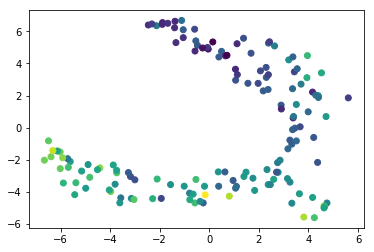

In [15]:
tsne = TSNE(n_components=2, learning_rate=40)
X_tsne = tsne.fit_transform(Stats)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y)
plt.figure(figsize=(175,100))
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter
# print X_tsne
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap=plt.cm.cool)
# print Y
plt.show()